In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

# 1. Data Reading 

In [2]:
housing = pd.read_csv('./data/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Exploratory Data Analysis

#### Looking at the data info above and the data dictionary attached with the assignment, the dataset contains categorical as well as continuous data. I will perform the following EDA steps to analyse the data:
- Step 1: Univariate Analysis: Distribution of Categorical Data
- Step 2: Univariate Analysis: Continuous Data
- Step 3: Bivariate Analysis of Categorical variables against Target variable `SalePrice`
- Step 4: Bivariate Analysis of Continuous Data against Target variable `SalePrice`

## Step 1: Univariate Analysis

### 1. Distribution of Categorical Data

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### We need to convert the categorical variables of type int/float to object type

In [7]:
columns_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond']
housing[columns_to_convert] = housing[columns_to_convert].astype('str')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

#### Also convert Ordinal variables to object type

In [8]:
ordinal_data = ['BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                'Fireplaces', 'GarageCars', 'TotRmsAbvGrd']
housing[ordinal_data] = housing[ordinal_data].astype('str')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

### Plot the distribution of Categorical Data

In [9]:
datatypes = housing.dtypes
categorical_data = list(datatypes[datatypes == 'object'].index)
categorical_data

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

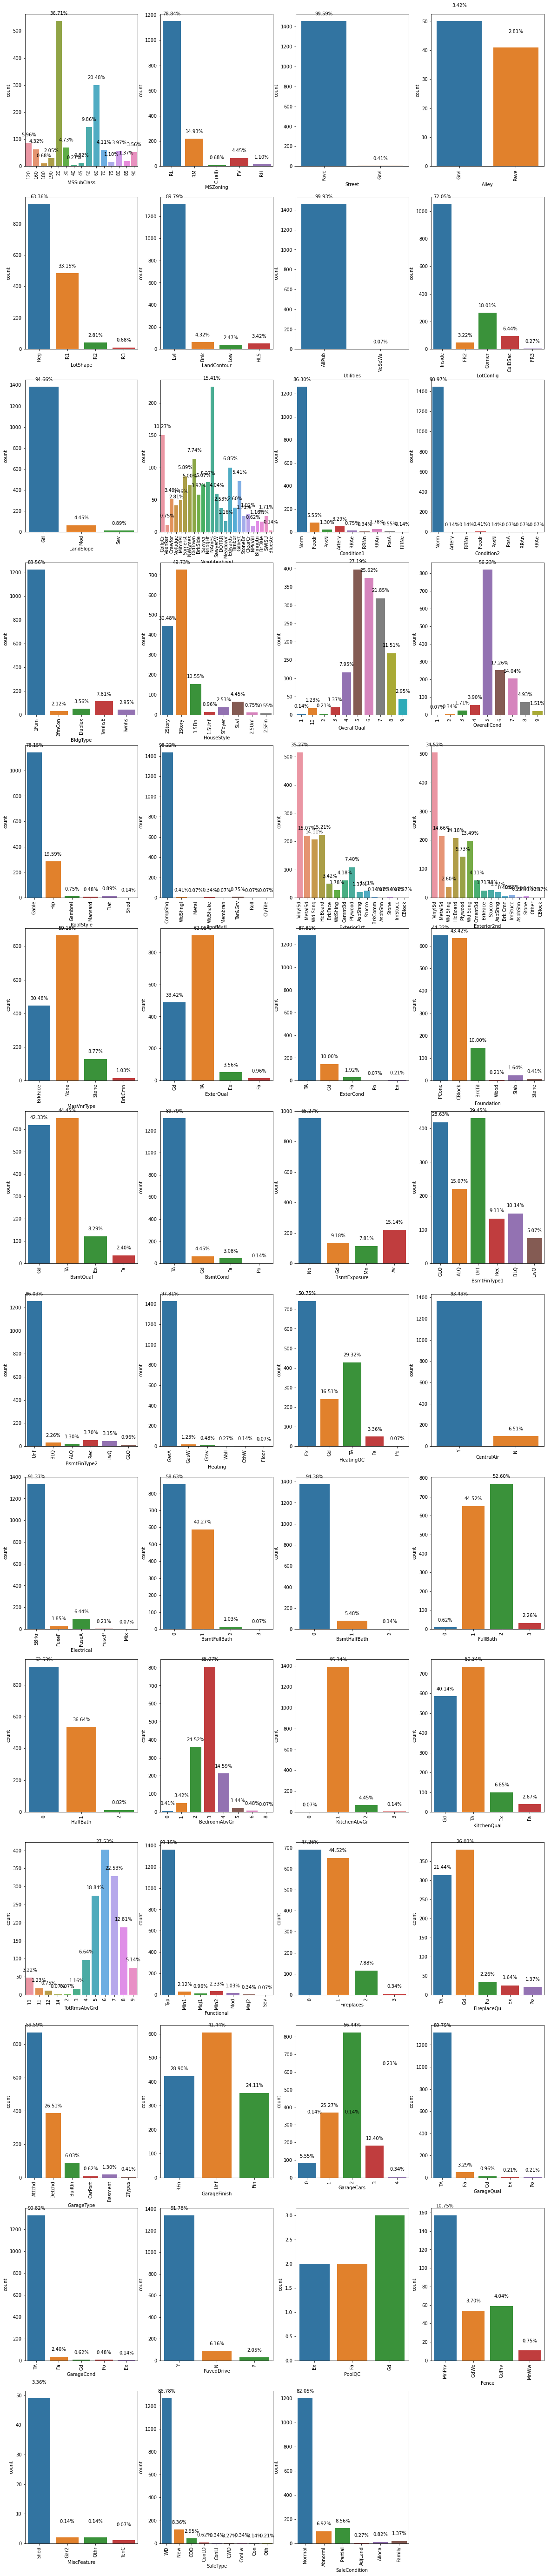

In [10]:
plt.figure(figsize=(20, 100))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14,4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.20)
    plt.xticks(rotation="vertical")
    sns.countplot(x=i[1], data=housing)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(housing)),
                ha="center") 

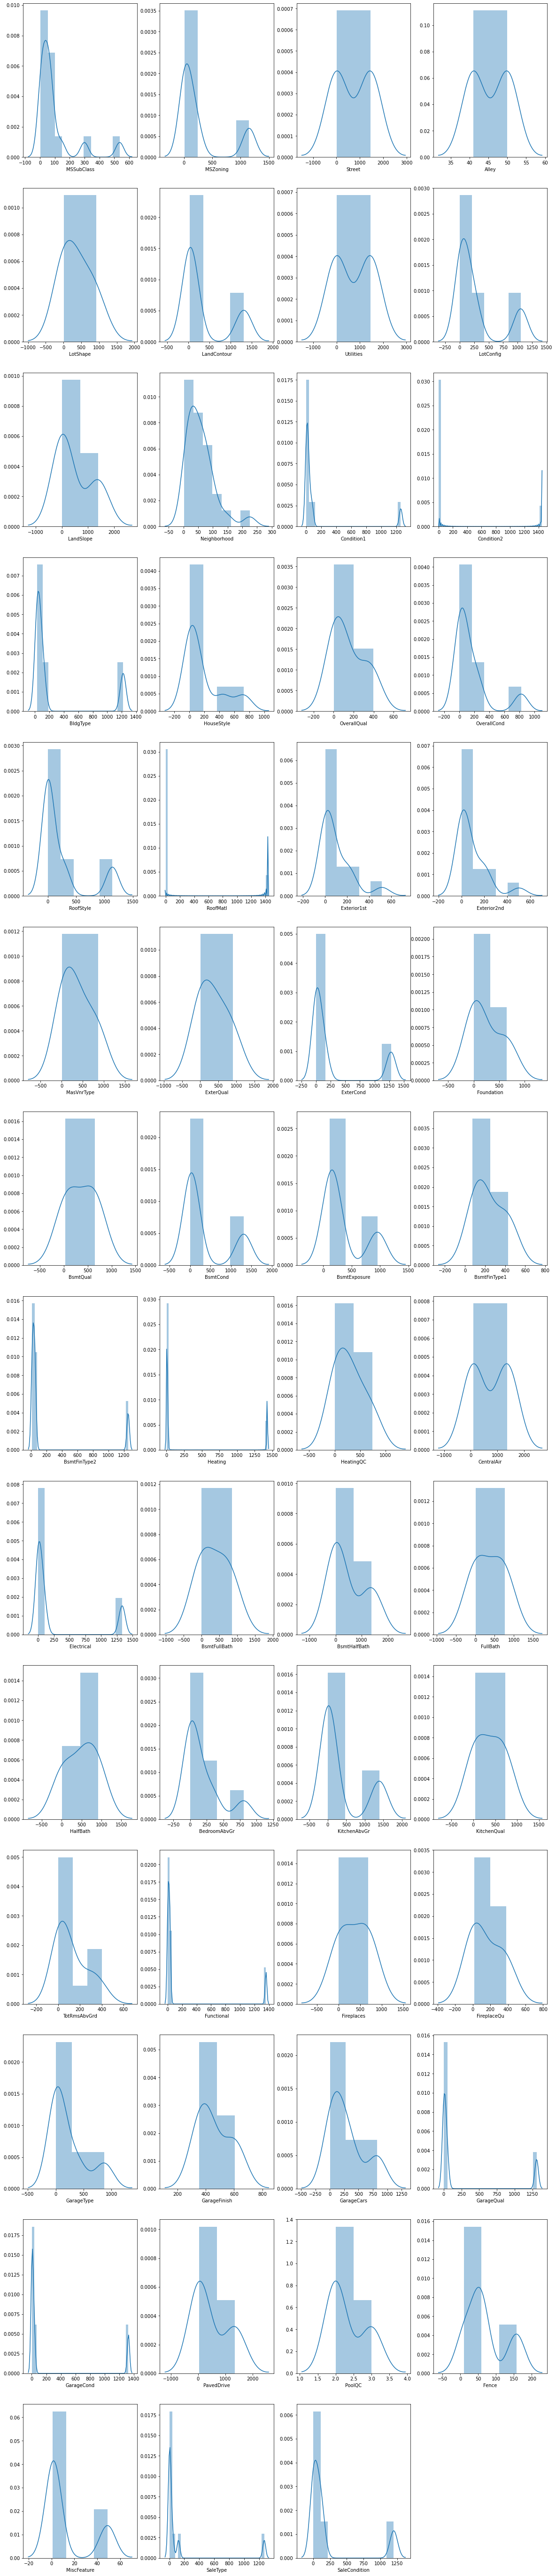

In [11]:
plt.figure(figsize=(20,100))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14,4, i[0]+1)
    sns.distplot(housing[i[1]].value_counts())

## Step 2: Univariate Analysis : Continuous Data

In [12]:
numerical_data = list(datatypes[datatypes != 'object'].index)
numerical_data

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
# Remove 'ID' from the list as it is a unique value identifier
numerical_data.pop(0)

'Id'

In [15]:
housing[numerical_data].describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.97, 0.98, 0.99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,107.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,2007.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
97%,120.000000,21571.800000,2007.000000,2008.000000,574.410000,1375.990000,546.230000,1589.380000,1905.460000,1981.610000,1245.530000,0.000000,2633.230000,2008.000000,884.000000,385.380000,213.230000,216.000000,0.000000,192.000000,0.000000,400.000000,12.000000,2010.000000,374230.000000
98%,124.000000,25251.620000,2008.000000,2008.000000,650.980000,1442.640000,658.120000,1678.200000,2001.640000,2072.280000,1318.560000,0.000000,2782.380000,2008.000000,907.460000,430.100000,240.820000,235.640000,0.000000,223.640000,0.000000,500.000000,12.000000,2010.000000,394931.060000


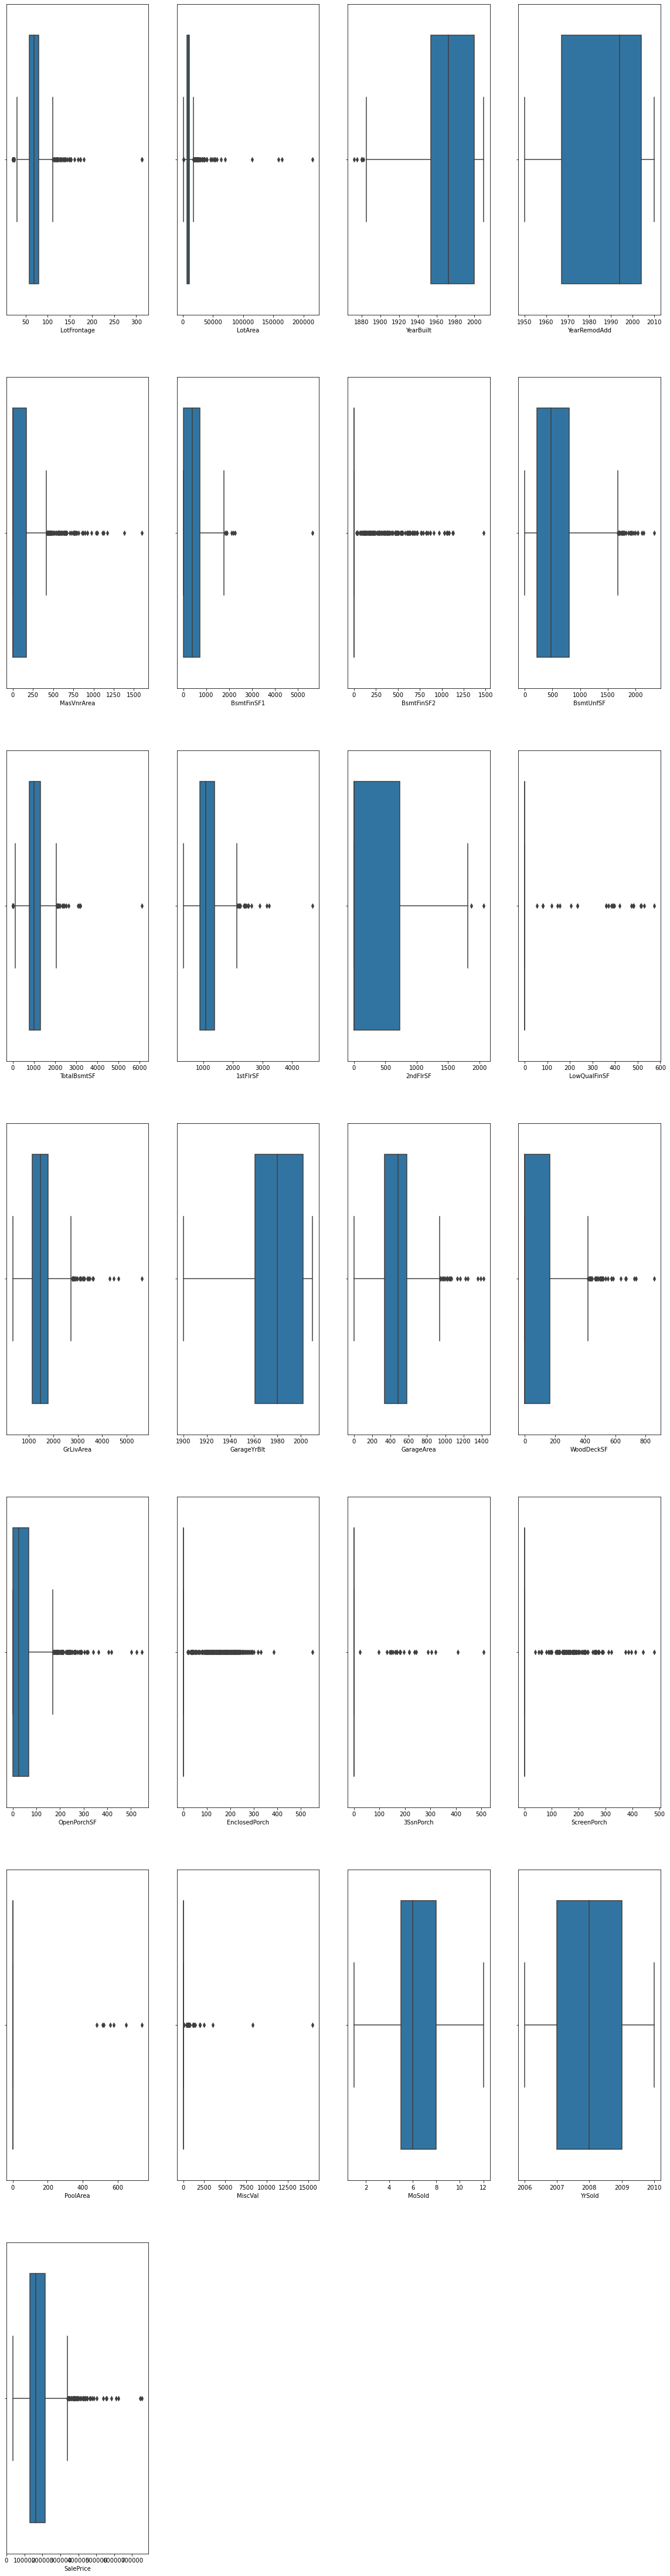

In [16]:
plt.figure(figsize = (20,80))
for i in enumerate(numerical_data): 
    ax = plt.subplot(7,4, i[0]+1)
    sns.boxplot(housing[i[1]])

## Step 3: Bivariate Analysis of Categorical variables against Target variable `SalePrice` 


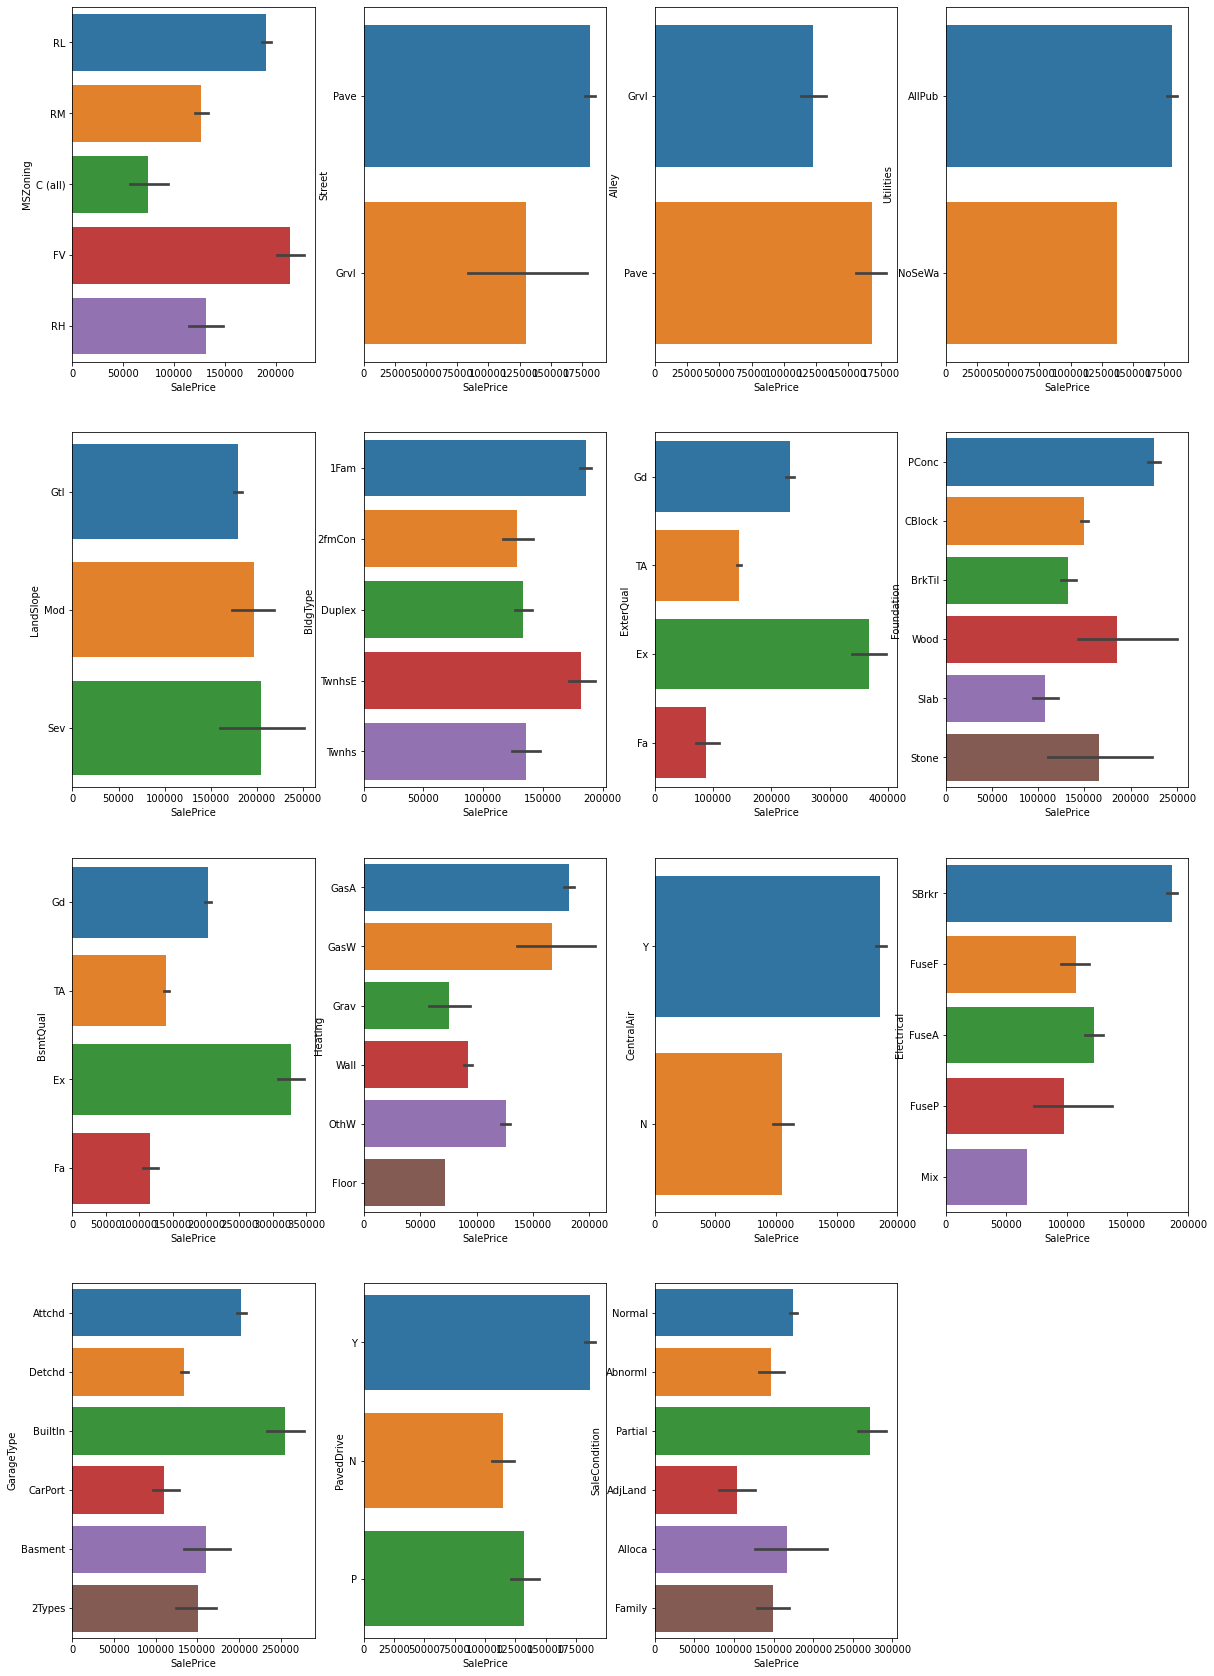

In [17]:
categorical_data = ['MSZoning', 'Street', 'Alley', 'Utilities', 'LandSlope', 'BldgType', 
                    'ExterQual', 'Foundation', 'BsmtQual', 'Heating', 'CentralAir', 
                   'Electrical', 'GarageType', 'PavedDrive', 'SaleCondition']
plt.figure(figsize=(20,30))
for i in enumerate(categorical_data): 
    ax = plt.subplot(4, 4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    sns.barplot(x = 'SalePrice', y = i[1], data = housing)

## Step 4: Bivariate Analysis of Continuous Data against Target variable `SalePrice`

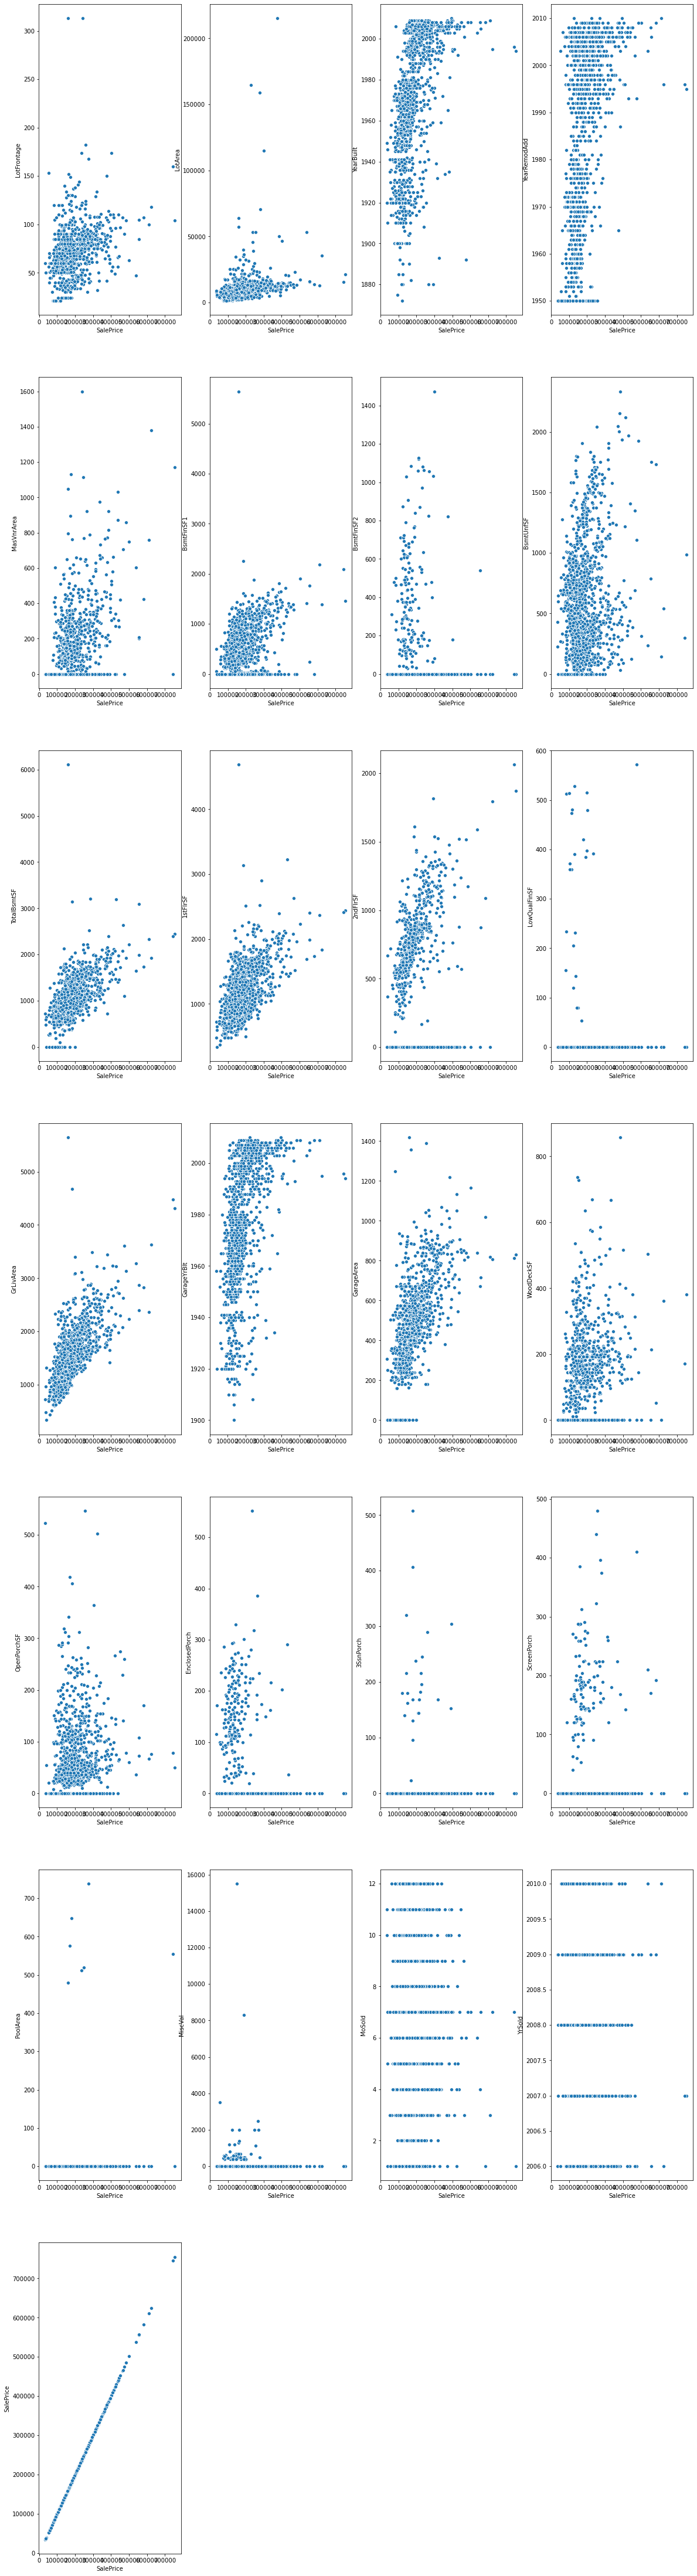

In [18]:
plt.figure(figsize = (20,80))
for i in enumerate(numerical_data): 
    ax = plt.subplot(7,4, i[0]+1)
    sns.scatterplot(x='SalePrice', y = i[1], data=housing)

# 2. Data Cleaning
- Step 1: Replace Meaningfull missing with category mentioned in Data Dictionary
- Step 2: Remove columns with high null percentage if any
- Step 3: Impute continuous data with Mean/Median. 
- Step 4: Impute categorical data with Mode or a new category in case of meaningfull missings
- Step 5: Convert Year based columns to Age and remove the year based columns.
- Step 6: Remove unnecessary columns such as 'Id'
- Step 7: Remove columns with highly skewed data


## Step 1: Replace Meaningfull missing with category mentioned in Data Dictionary

In [19]:
# Percentage of null values
round((housing.isnull().sum()/len(housing.index)) * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Following Columns with null data have meaningful values of NA as in data dictionary: 
1. Alley - No alley Access
2. MasVnrType - None
3. MasVnrArea - Replace with 0
4. BsmtQual - No Basement
5. BsmtCond - No Basement
6. BsmtExposure - No Basement
7. BsmtFinType1 - No Basement 
8. BsmtFinType2 - No Basement
9. FireplaceQu - No Fireplace
10. GarageType - No Garage
11. GarageYrBlt - As no garage, it shall replace with current year 
12. GarageFinish - No Garage
13. GarageQual - No Garage
14. GarageCond - No Garage
15. PoolQC - No Pool
16. Fence - No Fence
17. MiscFeature - None

In [20]:
values_to_replace = {
    'Alley': 'No alley Access',
    'MasVnrType': 'None',
    'MasVnrArea': 0.0,
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtFinType2': 'No Basement',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'GarageFinish': 'No Garage',
    'GarageQual': 'No Garage',
    'GarageCond': 'No Garage',
    'PoolQC': 'No Pool',
    'Fence': 'No Fence',
    'MiscFeature': 'None'
}
housing.fillna(value = values_to_replace, inplace=True)
round((housing.isnull().sum()/len(housing.index)) * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Step 2: Remove columns with high null percentage if any

#### As there are no such columns, skip this step

## Step 3: Impute continuous data with Mean/Median. 

#### Now we are left with `LotFrontage`, `Electrical`, and `GarageYrBlt` columns. 
1. `LotFrontage`: Continuous variable with outliers. Bin the outliers and impute with Median
2. `GarageYrBlt`: Calculate GarageAge from GarageYrBlt. In case of null, impute GarageAge as 0. 

In [21]:
housing['LotFrontage'].fillna(housing['LotFrontage'].median(), inplace = True)

## Step 4: Impute continuous data with Mean/Median. 
`Electrical`: Impute with mode. 


In [22]:
mode_value = housing['Electrical'].mode(dropna=True)[0]
housing['Electrical'].fillna(mode_value, inplace = True)

In [23]:
round((housing.isnull().sum()/len(housing.index)) * 100, 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

## Step 5: Convert Year based columns to Age and remove the year and month based columns.

In [24]:
year_based_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
today = date.today()

housing['ConstructionAge'] = housing['YearBuilt'].apply(lambda x: today.year - x)
housing['RemodelAge'] = housing['YearRemodAdd'].apply(lambda x: today.year - x)
housing['GarageAge'] = housing['GarageYrBlt'].apply(lambda x: today.year - x)
housing['TimeSinceSold'] = housing['YrSold'].apply(lambda x: today.year - x)
housing.drop(year_based_columns, axis = 1, inplace = True)
round((housing.isnull().sum()/len(housing.index)) * 100, 2)

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage        0.00
LotArea            0.00
Street             0.00
Alley              0.00
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.00
MasVnrArea         0.00
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
BsmtQual           0.00
BsmtCond           0.00
BsmtExposure       0.00
BsmtFinType1       0.00
BsmtFinSF1         0.00
BsmtFinType2       0.00
BsmtFinSF2         0.00
BsmtUnfSF          0.00
TotalBsmtSF        0.00
Heating            0.00
HeatingQC          0.00
CentralAir         0.00
Electrical         0.00
1stFlrSF        

In [25]:
# Drop month based columns
housing.drop('MoSold', axis = 1, inplace=True)
housing.shape

(1460, 80)

#### Check GarageAge for outliers and impute the null values

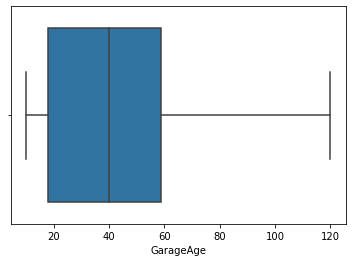

In [26]:
sns.boxplot(housing['GarageAge'])

#### In case the GarageAge is null, that means there is no Garage, so impute with 0

In [27]:
housing['GarageAge'].fillna(0, inplace = True)
round((housing.isnull().sum()/len(housing.index)) * 100, 2)

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage        0.0
LotArea            0.0
Street             0.0
Alley              0.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         0.0
MasVnrArea         0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           0.0
BsmtCond           0.0
BsmtExposure       0.0
BsmtFinType1       0.0
BsmtFinSF1         0.0
BsmtFinType2       0.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF           0.0
2ndFlrSF           0.0
LowQualFinS

## Step 6: Remove unnecessary columns

In [28]:
housing.drop('Id', axis = 1, inplace = True)

## Step 7: Remove highly skewed categorical columns

In [29]:
datatypes = housing.dtypes
categorical_data = list(datatypes[datatypes == 'object'].index)
categorical_data

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

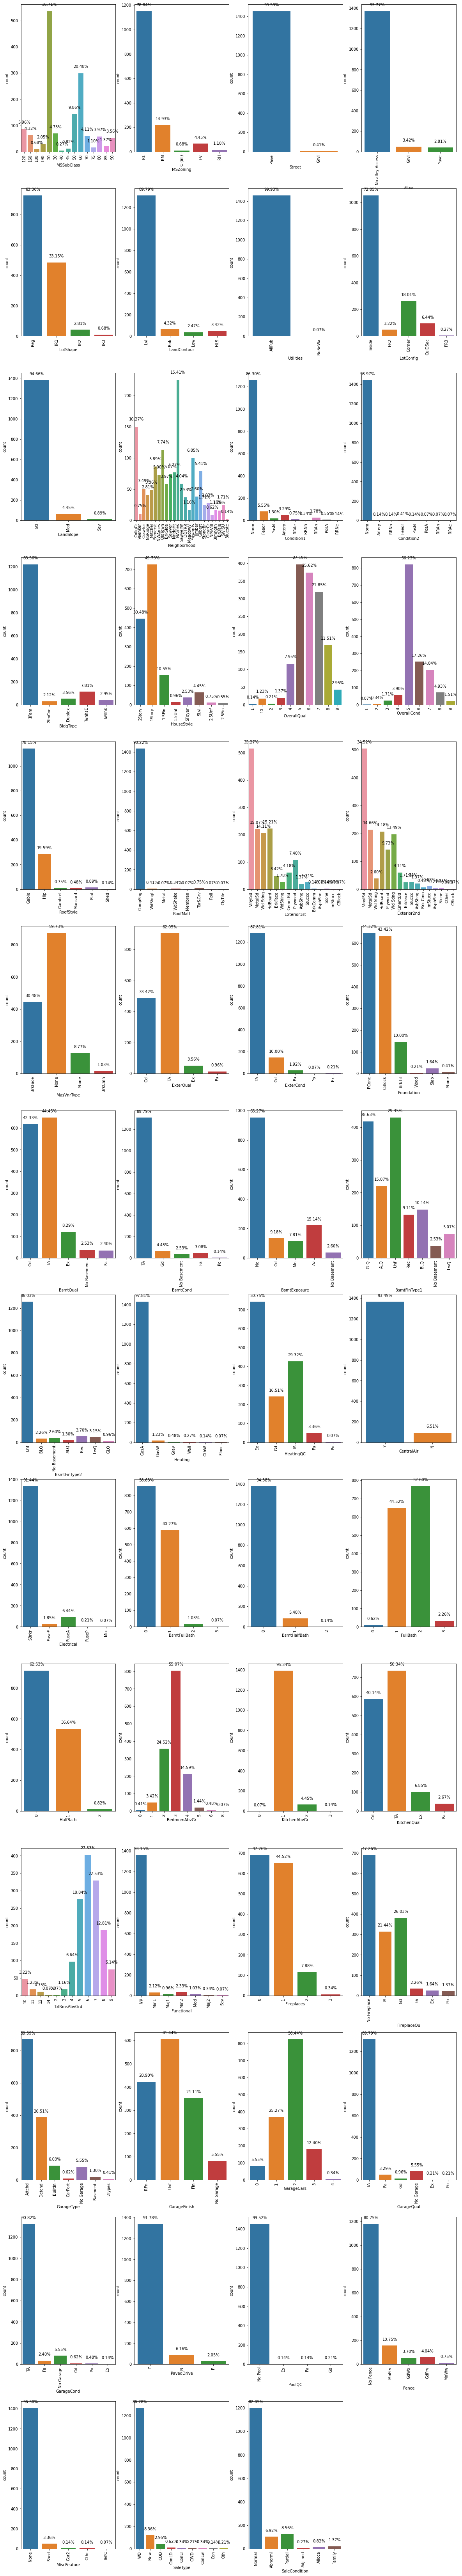

In [30]:
plt.figure(figsize=(20, 120))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14,4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    plt.xticks(rotation="vertical")
    sns.countplot(x=i[1], data=housing)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(housing)),
                ha="center") 

In [31]:
highly_skewed_data = ['Street', 'Alley',  'LandContour', 'BldgType', 'Utilities', 'LandSlope', 
                      'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond',
                      'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'KitchenAbvGr', 
                      'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                      'MiscFeature', 'SaleType', 'SaleCondition', 'BsmtHalfBath']
housing.drop(highly_skewed_data, axis = 1, inplace = True)

In [32]:
housing.shape

(1460, 53)

# 3. Data Preparation 
- Analysing and transforming the target variable
- Creating Dummy variables
- Train Test Split
- Data Scaling

### Step 1. Analyse and transform Target variable `SalePrice`

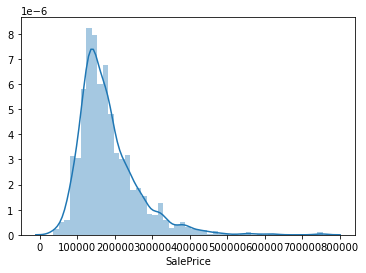

In [33]:
sns.distplot(housing['SalePrice'])

#### As the variable is right skewed, we need to use transformation to make it a normally distributed data. I will be using log transformation for `SalePrice`

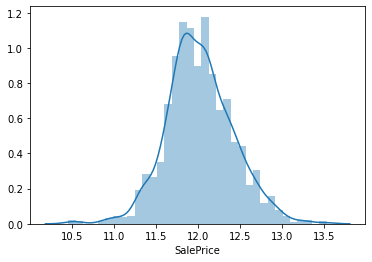

In [34]:
housing.SalePrice = np.log1p(housing.SalePrice)
sns.distplot(housing.SalePrice)

### Step 2. Convert Categorical data to Dummy Variables

In [35]:
# list of categorical data remained after cleaning
datatypes = housing.dtypes
categorical_data = list(datatypes[datatypes == 'object'].index)
categorical_data

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars']

### Conversion to Dummy Variables

In [36]:
housing = pd.get_dummies(housing, columns = categorical_data, drop_first = True)
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,ConstructionAge,RemodelAge,GarageAge,TimeSinceSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,12.247699,17,17,17.0,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,12.109016,44,44,44.0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [37]:
housing.shape

(1460, 210)

### Step 3: Splitting the data in Training and Test Data

In [38]:
X = housing.drop('SalePrice', axis = 1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,ConstructionAge,RemodelAge,GarageAge,TimeSinceSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,17,17,17.0,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,44,44,44.0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,

In [39]:
y = housing.SalePrice
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.7, random_state = 100)

### Step 4: Rescaling the Numeric Variables
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

In [41]:
# 1. Instantiate a StandardScaler Object
scaler = StandardScaler()

In [42]:
# 3. Fit and Transform the data
datatypes = X_train.dtypes
numerical_data = list(datatypes[datatypes != 'uint8'].index)
numerical_data

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'ConstructionAge',
 'RemodelAge',
 'GarageAge',
 'TimeSinceSold']

In [43]:
X_train[numerical_data].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,ConstructionAge,RemodelAge,GarageAge,TimeSinceSold
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,104.489716,448.165524,50.087169,563.745348,1061.998041,1168.611166,343.540646,5.999021,1518.150833,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,48.678746,35.015671,38.911851,12.181195
std,22.090553,10308.062725,187.341089,465.115135,170.847470,448.739203,459.098042,397.896911,435.498994,48.207914,531.849898,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,30.321038,20.604962,25.752176,1.339256
min,21.000000,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,10.000000
25%,60.000000,7449.000000,0.000000,0.000000,0.000000,216.000000,793.000000,876.000000,0.000000,0.000000,1135.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,16.000000,17.000000,11.000000
50%,69.000000,9505.000000,0.000000,392.000000,0.000000,462.000000,994.000000,1086.000000,0.000000,0.000000,1466.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,26.000000,35.000000,12.000000
75%,78.000000,11512.000000,158.000000,712.000000,0.000000,806.000000,1314.000000,1422.000000,728.000000,0.000000,1774.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,53.000000,57.000000,13.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,515.000000,5642.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,148.000000,70.000000,120.000000,14.000000


In [44]:
# 3. Fit and Transform the data
X_train[numerical_data] = scaler.fit_transform(X_train[numerical_data])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,ConstructionAge,RemodelAge,GarageAge,TimeSinceSold,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
318,0.925326,-0.057261,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.715324,-0.389207,-0.462784,-0.882411,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
239,-0.795709,-0.169753,-0.558025,-0.761831,-0.293313,0.1722

# 4. Building the Model
- Step 1: Feature selection using RFE
- Step 2: Use Ridge for Model Building
- Step 3: Use Lasso for Model Building
- Step 4: Compute top features from both models

In [45]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Step 1: Feature Selection

In [46]:
ridge = Ridge()
ridge.fit(X_train, y_train)

rfe = RFE(ridge, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

## Step 2: Use Ridge for Model Building

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 141),
 ('LotArea', False, 87),
 ('MasVnrArea', False, 143),
 ('BsmtFinSF1', False, 157),
 ('BsmtFinSF2', False, 147),
 ('BsmtUnfSF', False, 148),
 ('TotalBsmtSF', False, 136),
 ('1stFlrSF', False, 74),
 ('2ndFlrSF', False, 67),
 ('LowQualFinSF', False, 145),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 95),
 ('WoodDeckSF', False, 107),
 ('OpenPorchSF', False, 158),
 ('EnclosedPorch', False, 132),
 ('3SsnPorch', False, 126),
 ('ScreenPorch', False, 124),
 ('PoolArea', False, 99),
 ('MiscVal', False, 156),
 ('ConstructionAge', True, 1),
 ('RemodelAge', False, 40),
 ('GarageAge', False, 137),
 ('TimeSinceSold', False, 134),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', False, 88),
 ('MSSubClass_20', False, 21),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 122),
 ('MSSubClass_50', False, 43),
 ('MSSubClass_60', False, 84),
 ('MSSubClass_70', False, 42),
 ('MSSubClass_75', False, 9),
 ('MSSub

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'ConstructionAge', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_30', 'MSSubClass_40', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'OverallQual_2', 'OverallQual_8',
       'OverallQual_9', 'OverallCond_3', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'ExterQual_Fa',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'HeatingQC_Po', 'BsmtFullBath_3',
       'BedroomAbvGr_5', 'KitchenQual_Fa', 'KitchenQual_TA', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_12', 'Fireplaces_2', 'Fireplaces_3', 'GarageType_Attchd',
       'G

In [49]:
# Creating train dataframe with RFE selected variables
X_train_model_ridge = X_train[col]

In [50]:
# list of alphas to tune
params = {'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_model_ridge, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
model_cv_ridge.best_params_

{'alpha': 2.0}

In [52]:
model_cv_ridge.best_score_

-0.09880074969053507

In [53]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005891,0.000739,0.003434,0.000210,0.001,{'alpha': 0.001},-0.102202,-0.094950,-0.107308,-0.097806,-0.096447,-0.099743,0.004492,18,-0.092114,-0.092045,-0.090022,-0.093754,-0.094411,-0.092469,0.001531
1,0.005891,0.000357,0.003520,0.000188,0.001,{'alpha': 0.001},-0.102202,-0.094950,-0.107308,-0.097806,-0.096447,-0.099743,0.004492,18,-0.092114,-0.092045,-0.090022,-0.093754,-0.094411,-0.092469,0.001531
2,0.005706,0.000332,0.003493,0.000404,0.01,{'alpha': 0.01},-0.102172,-0.094962,-0.107358,-0.097808,-0.096370,-0.099734,0.004514,17,-0.092123,-0.092051,-0.090026,-0.093759,-0.094416,-0.092475,0.001531
3,0.005920,0.000439,0.003611,0.000125,0.05,{'alpha': 0.05},-0.102041,-0.095013,-0.107559,-0.097815,-0.096045,-0.099695,0.004607,16,-0.092162,-0.092078,-0.090044,-0.093786,-0.094436,-0.092501,0.001531
4,0.005482,0.000250,0.003321,0.000131,0.1,{'alpha': 0.1},-0.101883,-0.095074,-0.107774,-0.097818,-0.095678,-0.099646,0.004713,15,-0.092209,-0.092110,-0.090065,-0.093817,-0.094499,-0.092540,0.001542


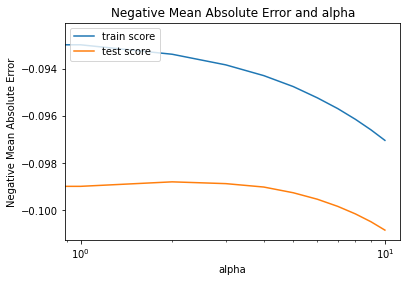

In [54]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
# Compute model with optimal alpha, i.e., 2.0
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_model_ridge, y_train)
ridge.coef_


array([ 0.17601053, -0.11078301, -0.16419202, -0.11008305, -0.08175035,
       -0.05972783,  0.14100137,  0.15478308,  0.1986047 ,  0.12675276,
        0.11193314,  0.13837177, -0.07621667, -0.13937628,  0.09801907,
        0.15267156,  0.15917291,  0.12241982, -0.21728538,  0.10815401,
        0.22195376, -0.14872118,  0.07663382,  0.11426421,  0.14498866,
        0.22323316,  0.06180117, -0.10840089,  0.11146042, -0.13842158,
       -0.13666677, -0.08574969, -0.11402048, -0.13724528,  0.11310287,
       -0.09891234, -0.11402048, -0.05602726,  0.08598856, -0.10757039,
       -0.09274542, -0.06642767, -0.1984537 , -0.23809219,  0.08626316,
       -0.19526137,  0.12428332,  0.06922594,  0.08777434,  0.16206261])

### Scale the test data

In [56]:
X_test = X_test[col]

In [57]:
datatypes = X_test.dtypes
numerical_data = list(datatypes[datatypes != 'uint8'].index)
numerical_data

['GrLivArea', 'ConstructionAge']

In [58]:
# 1. Instantiate a StandardScaler Object

X_test[numerical_data] = scaler.fit_transform(X_test[numerical_data])
X_test.head()

,GrLivArea,ConstructionAge,MSSubClass_160,MSSubClass_180,MSSubClass_30,MSSubClass_40,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,OverallQual_2,OverallQual_8,OverallQual_9,OverallCond_3,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,ExterQual_Fa,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No Basement,BsmtFinType1_No Basement,HeatingQC_Po,BsmtFullBath_3,BedroomAbvGr_5,KitchenQual_Fa,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageCars_4
1436,-1.264334,0.004795,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
57,0.413047,-1.097915,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
780,-0.502066,-0.797176,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
382,0.563933,-1.164746,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1170,-0.766606,-0.195697,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [59]:
# predict
y_train_pred_ridge = ridge.predict(X_train_model_ridge)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8909384809593521
0.8441924309755039


In [60]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge)

0.017138183417309875

In [61]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge)

0.025679046304106452

## Step 3: Use Lasso for Model Building 

In [62]:
# Creating train dataframe with RFE selected variables
X_train_model_lasso = X_train[col]

In [63]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_model_lasso, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
model_cv_lasso.best_params_

{'alpha': 0.001}

In [65]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008898,0.000986,0.003794,0.000331,0.001,{'alpha': 0.001},-0.099931,-0.105108,-0.115351,-0.099336,-0.096997,-0.103345,0.006562,1,-0.098623,-0.098346,-0.094741,-0.097965,-0.099627,-0.097861,0.001654
1,0.007874,0.001297,0.003382,0.000233,0.001,{'alpha': 0.001},-0.099931,-0.105108,-0.115351,-0.099336,-0.096997,-0.103345,0.006562,1,-0.098623,-0.098346,-0.094741,-0.097965,-0.099627,-0.097861,0.001654
2,0.005150,0.000952,0.002908,0.000602,0.01,{'alpha': 0.01},-0.123076,-0.146792,-0.145409,-0.136050,-0.140268,-0.138319,0.008525,3,-0.139603,-0.135311,-0.136465,-0.136555,-0.136049,-0.136796,0.001470
3,0.005592,0.001026,0.003265,0.000609,0.05,{'alpha': 0.05},-0.150836,-0.163280,-0.163366,-0.165415,-0.166432,-0.161866,0.005646,4,-0.164632,-0.157512,-0.159031,-0.160456,-0.163156,-0.160957,0.002614
4,0.006050,0.000568,0.003528,0.000324,0.1,{'alpha': 0.1},-0.176381,-0.183119,-0.183197,-0.183083,-0.197639,-0.184684,0.006986,5,-0.186958,-0.180394,-0.182257,-0.183550,-0.186738,-0.183979,0.002549


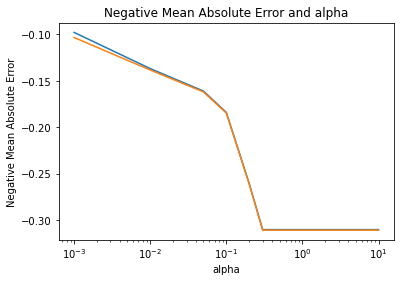

In [66]:
# plot
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.show()

In [67]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train_model_lasso, y_train)

Lasso(alpha=0.001)

In [68]:
# predict
y_train_pred_lasso = lm.predict(X_train_model_lasso)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.872892295062164
0.8466256153000529


In [69]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso)

0.01997400348115485

In [70]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso)

0.0252780269356142

### Step 4: Compute top features from both the models
#### Ridge Model

In [95]:
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train_model_ridge.columns
cols = cols.insert(0, "constant")
ridge_features = list(zip(cols, ridge_model_parameters))

In [96]:
def sortFeatures(featureList):
    featureList.sort(key = lambda x: abs(x[1]), reverse = True)
    return featureList


In [97]:
# Print top 10 features along with constant
print(sortFeatures(ridge_features)[0:11])

[('constant', 11.802), ('TotRmsAbvGrd_12', -0.238), ('OverallCond_9', 0.223), ('OverallQual_9', 0.222), ('OverallQual_2', -0.217), ('MSZoning_RL', 0.199), ('TotRmsAbvGrd_11', -0.198), ('Fireplaces_3', -0.195), ('GrLivArea', 0.176), ('MSSubClass_160', -0.164), ('GarageCars_4', 0.162)]


In [103]:
print(sortFeatures(ridge_features))

[('constant', 11.9), ('OverallQual_9', 0.227), ('GrLivArea', 0.183), ('TotRmsAbvGrd_12', -0.161), ('OverallCond_9', 0.156), ('OverallCond_3', -0.154), ('Neighborhood_NridgHt', 0.145), ('BsmtQual_No Basement', -0.145), ('Neighborhood_Somerst', 0.143), ('MSSubClass_160', -0.14), ('Neighborhood_Crawfor', 0.126), ('OverallCond_8', 0.124), ('ConstructionAge', -0.123), ('Neighborhood_MeadowV', -0.116), ('OverallQual_8', 0.115), ('BsmtExposure_Gd', 0.113), ('KitchenQual_Fa', -0.11), ('TotRmsAbvGrd_11', -0.103), ('GarageType_Attchd', 0.103), ('OverallCond_7', 0.102), ('BsmtExposure_No Basement', -0.09), ('ExterQual_Fa', -0.089), ('Fireplaces_2', 0.083), ('Exterior1st_BrkFace', 0.079), ('Fireplaces_3', -0.079), ('Neighborhood_Edwards', -0.077), ('MSZoning_RL', 0.075), ('KitchenQual_TA', -0.073), ('BsmtQual_TA', -0.066), ('GarageType_Detchd', 0.061), ('OverallCond_6', 0.059), ('MSSubClass_30', -0.057), ('Neighborhood_ClearCr', 0.056), ('Neighborhood_NoRidge', 0.055), ('Neighborhood_StoneBr', 0.0

#### Lasso Model

In [99]:
lasso_model_parameters = list(lm.coef_)
lasso_model_parameters.insert(0, lm.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train_model_lasso.columns
cols = cols.insert(0, "constant")
lasso_features = list(zip(cols, lasso_model_parameters))

In [100]:
# Print top 10 features along with constant
print(sortFeatures(lasso_features)[0:11])

[('constant', 11.9), ('OverallQual_9', 0.227), ('GrLivArea', 0.183), ('TotRmsAbvGrd_12', -0.161), ('OverallCond_9', 0.156), ('OverallCond_3', -0.154), ('Neighborhood_NridgHt', 0.145), ('BsmtQual_No Basement', -0.145), ('Neighborhood_Somerst', 0.143), ('MSSubClass_160', -0.14), ('Neighborhood_Crawfor', 0.126)]


In [104]:
print(sortFeatures(lasso_features))

[('constant', 11.9), ('OverallQual_9', 0.227), ('GrLivArea', 0.183), ('TotRmsAbvGrd_12', -0.161), ('OverallCond_9', 0.156), ('OverallCond_3', -0.154), ('Neighborhood_NridgHt', 0.145), ('BsmtQual_No Basement', -0.145), ('Neighborhood_Somerst', 0.143), ('MSSubClass_160', -0.14), ('Neighborhood_Crawfor', 0.126), ('OverallCond_8', 0.124), ('ConstructionAge', -0.123), ('Neighborhood_MeadowV', -0.116), ('OverallQual_8', 0.115), ('BsmtExposure_Gd', 0.113), ('KitchenQual_Fa', -0.11), ('TotRmsAbvGrd_11', -0.103), ('GarageType_Attchd', 0.103), ('OverallCond_7', 0.102), ('BsmtExposure_No Basement', -0.09), ('ExterQual_Fa', -0.089), ('Fireplaces_2', 0.083), ('Exterior1st_BrkFace', 0.079), ('Fireplaces_3', -0.079), ('Neighborhood_Edwards', -0.077), ('MSZoning_RL', 0.075), ('KitchenQual_TA', -0.073), ('BsmtQual_TA', -0.066), ('GarageType_Detchd', 0.061), ('OverallCond_6', 0.059), ('MSSubClass_30', -0.057), ('Neighborhood_ClearCr', 0.056), ('Neighborhood_NoRidge', 0.055), ('Neighborhood_StoneBr', 0.0

# Conclusion:
### Ridge vs Lasso

|                         | Ridge                | Lasso               |
|-------------------------|----------------------|---------------------|
| Train r-square          | 0.8909384809593521   | 0.872892295062164   |
| Test r-square           | 0.8441924309755039   | 0.8466256153000529  |
| Train Mean Square Error | 0.017138183417309875 | 0.01997400348115485 |
| Test Mean Square Error  | 0.025679046304106452 | 0.0252780269356142  |

### Top Ridge Features

| Ridge | Feature Name    | Coefficient |
|-------|-----------------|-------------|
|       | constant        | 11.802      |
| 1     | TotRmsAbvGrd_12 | -0.238      |
| 2     | OverallCond_9   | 0.223       |
| 3     | OverallQual_9   | 0.222       |
| 4     | OverallQual_2   | -0.217      |
| 5     | MSZoning_RL     | 0.199       |
| 6     | TotRmsAbvGrd_11 | -0.198      |
| 7     | Fireplaces_3    | -0.195      |
| 8     | GrLivArea       | 0.176       |
| 9     | MSSubClass_160  | -0.164      |
| 10    | GarageCars_4    | 0.162       |


### Top Lasso Features:

| Ridge | Feature Name         | Coefficient |
|-------|----------------------|-------------|
|       | constant             | 11.9        |
| 1     | OverallQual_9        | 0.227       |
| 2     | GrLivArea            | 0.183       |
| 3     | TotRmsAbvGrd_12      | -0.161      |
| 4     | OverallCond_9        | 0.156       |
| 5     | OverallCond_3        | -0.154      |
| 6     | Neighborhood_NridgHt | 0.145       |
| 7     | BsmtQual_No Basement | -0.145      |
| 8     | Neighborhood_Somerst | 0.143       |
| 9     | MSSubClass_160       | -0.14       |
| 10    | Neighborhood_Crawfor | 0.126       |